### Business Understanding



The provided data is from The Johns Hopkins University, which will enable us to classify the Sepsis illness. Here is a table with a description of the various contained in our dataset and their detailed description.

##### Dataset Column Details

| Column   Name                | Attribute/Target | Description                                                                                                                                                                                                  |
|------------------------------|------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| ID                           | N/A              | Unique number to represent patient ID                                                                                                                                                                        |
| PRG           | Attribute1       |  Plasma glucose|
| PL               | Attribute 2     |   Blood Work Result-1 (mu U/ml)                                                                                                                                                |
| PR              | Attribute 3      | Blood Pressure (mm Hg)|
| SK              | Attribute 4      | Blood Work Result-2 (mm)|
| TS             | Attribute 5      |     Blood Work Result-3 (mu U/ml)|                                                                                  
| M11     | Attribute 6    |  Body mass index (weight in kg/(height in m)^2|
| BD2             | Attribute 7     |   Blood Work Result-4 (mu U/ml)|
| Age              | Attribute 8      |    patients age  (years)|
| Insurance | N/A     | If a patient holds a valid insurance card|
| Sepssis                 | Target           | Positive: if a patient in ICU will develop a sepsis , and Negative: otherwise |

#### Hypothesis

H0: A patient's age does not affect his likelihood of developing a Sepsis.

Ha: A patient's age can affect his likelihood of developing a Sepsis

#### Analytical Questions

1. What is the relationship between the age of patients and the development of Sepsis?

2. Does the blood work result (PL) of patients posistively related to Sepsis development?

3. 

### Data Understanding

#### Importing Libraries

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, classification_report

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

#### Load train dataset

In [26]:
train_data = pd.read_csv('Paitients_Files_Train.csv')
train_data.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


#### Load test dataset

In [27]:
test_data = pd.read_csv('Paitients_Files_Test.csv')
test_data.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0


#### EDA

In [28]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


In [29]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
PRG,599.0,3.824708,3.362839,0.000,1.000,3.000,6.000,17.00
PL,599.0,120.153589,32.682364,0.000,99.000,116.000,140.000,198.00
PR,599.0,68.732888,19.335675,0.000,64.000,70.000,80.000,122.00
SK,599.0,20.562604,16.017622,0.000,0.000,23.000,32.000,99.00
TS,599.0,79.460768,116.576176,0.000,0.000,36.000,123.500,846.00
M11,599.0,31.920033,8.008227,0.000,27.100,32.000,36.550,67.10
BD2,599.0,0.481187,0.337552,0.078,0.248,0.383,0.647,2.42
Age,599.0,33.290484,11.828446,21.000,24.000,29.000,40.000,81.00
Insurance,599.0,0.686144,0.464447,0.000,0.000,1.000,1.000,1.00


In [30]:
test_data.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0


In [31]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         169 non-null    object 
 1   PRG        169 non-null    int64  
 2   PL         169 non-null    int64  
 3   PR         169 non-null    int64  
 4   SK         169 non-null    int64  
 5   TS         169 non-null    int64  
 6   M11        169 non-null    float64
 7   BD2        169 non-null    float64
 8   Age        169 non-null    int64  
 9   Insurance  169 non-null    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 13.3+ KB


In [32]:
test_data.isnull().sum()

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
dtype: int64

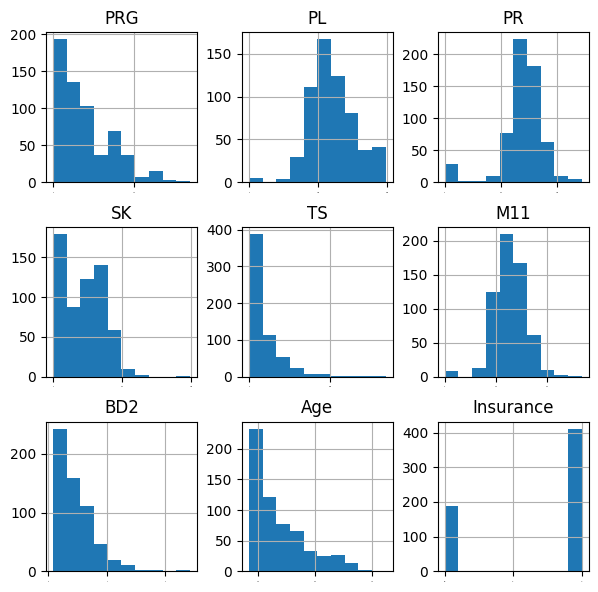

In [33]:
train_data.hist(xlabelsize=0, figsize = (7,7))
plt.show()

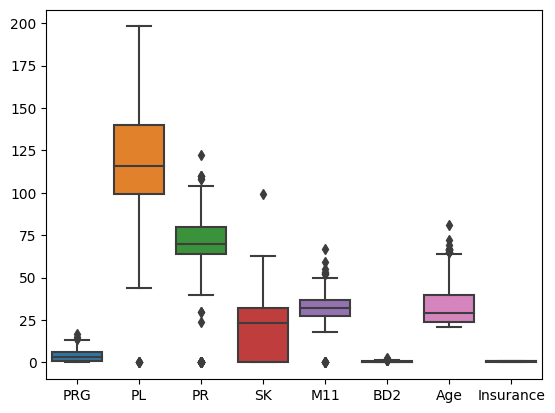

In [34]:
df_without_TS = train_data.drop(['TS'], axis = 1)
sns.boxplot(data=df_without_TS)
plt.show()

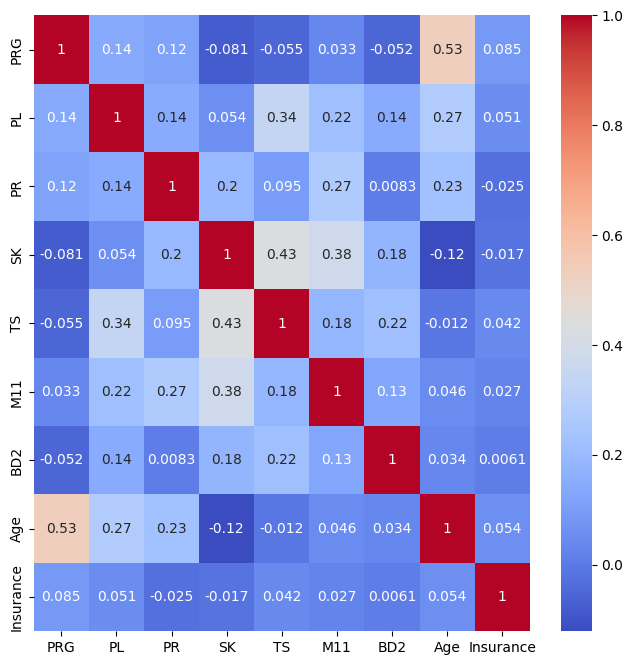

In [35]:
df_2 = train_data.drop(['ID', 'Sepssis'], axis = 1)

plt.figure(figsize=(8,8))
correlation = df_2.corr()
sns.heatmap(correlation, cmap='coolwarm', annot=True)

plt.show()

### Data Cleaning

In [36]:
train_data = train_data.drop(['ID'], axis = 1)

In [37]:
train_data.head()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,6,148,72,35,0,33.6,0.627,50,0,Positive
1,1,85,66,29,0,26.6,0.351,31,0,Negative
2,8,183,64,0,0,23.3,0.672,32,1,Positive
3,1,89,66,23,94,28.1,0.167,21,1,Negative
4,0,137,40,35,168,43.1,2.288,33,1,Positive


### Data Preparation

In [38]:
X = train_data.drop(['Sepssis'], axis = 1)

X

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,6,148,72,35,0,33.6,0.627,50,0
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,1
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
594,6,123,72,45,230,33.6,0.733,34,0
595,0,188,82,14,185,32.0,0.682,22,1
596,0,67,76,0,0,45.3,0.194,46,1
597,1,89,24,19,25,27.8,0.559,21,0


In [39]:
# setting variable for columns to be transformed

trans_columns = X.columns
trans_columns

Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object')

In [40]:
y = train_data['Sepssis']

y

0      Positive
1      Negative
2      Positive
3      Negative
4      Positive
         ...   
594    Negative
595    Positive
596    Negative
597    Negative
598    Positive
Name: Sepssis, Length: 599, dtype: object

In [41]:
type(y)

pandas.core.series.Series

### Creating Pipelines

#### Model 1 - `KNeighborsClassifier`

In [42]:
# creating pipeline and 1st ML model

preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), trans_columns),
        ('log_transformation', FunctionTransformer(np.log1p), trans_columns)
    ]
)

neighbors = KNeighborsClassifier()

pipeline_1 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('neighbors', neighbors)
])

##### Splitting of dataset

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10, stratify=y)

In [44]:
X_train.head()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
18,1,103,30,38,83,43.3,0.183,33,1
491,2,89,90,30,0,33.5,0.292,42,0
559,11,85,74,0,0,30.1,0.300,35,1
150,1,136,74,50,204,37.4,0.399,24,1
267,2,128,64,42,0,40.0,1.101,24,1


In [46]:
# checking dataset imbalance

y_train.value_counts()

Sepssis
Negative    313
Positive    166
Name: count, dtype: int64

In [47]:
### Encoding target dataset

encoder = LabelEncoder()

y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

##### Modeling

In [48]:
pipeline_1.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object')),
                                                 ('log_transformation',
                                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                                  Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object'))])),
                ('neighbors', KNeighborsClassifier())])

In [49]:
knn_pred = pipeline_1.predict(X_test)

In [50]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.76      0.85      0.80        78
           1       0.64      0.50      0.56        42

    accuracy                           0.73       120
   macro avg       0.70      0.67      0.68       120
weighted avg       0.72      0.72      0.72       120



#### Model 2 - `RandomForestClassifier`

In [51]:
rf = RandomForestClassifier(max_depth=2, random_state=10)

pipeline_2 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('random_forest', rf)
])

In [52]:
pipeline_2.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object')),
                                                 ('log_transformation',
                                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                                  Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object'))])),
                ('random_forest',
                 RandomForestClassifier(max_depth=2, random_state=10))])

In [53]:
rf_train_pred = pipeline_2.predict(X_train)
rf_test_pred = pipeline_2.predict(X_test)

In [54]:
print(classification_report(y_test, rf_test_pred))

              precision    recall  f1-score   support

           0       0.71      0.95      0.81        78
           1       0.75      0.29      0.41        42

    accuracy                           0.72       120
   macro avg       0.73      0.62      0.61       120
weighted avg       0.72      0.72      0.67       120



#### Model 3 - `XGBClassifier`

In [55]:
xg_model = XGBClassifier(max_depth=2,learning_rate=0.06)

pipeline_3 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('xg_model', xg_model)
])

In [56]:
pipeline_3.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object')),
                                                 ('log_transformation',
                                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                                  Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object'))])),
                ('xg_model',
                 XGBClassifier(base_...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.06,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=2, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [57]:
xgb_pred = pipeline_3.predict(X_test)

In [58]:
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.75      0.87      0.80        78
           1       0.66      0.45      0.54        42

    accuracy                           0.73       120
   macro avg       0.70      0.66      0.67       120
weighted avg       0.72      0.72      0.71       120



### Persit Model

In [59]:
joblib.dump(pipeline_1, 'pipeline.joblib')
joblib.dump(encoder, 'encoder.joblib')

['encoder.joblib']

In [60]:
joblib.dump(pipeline_2, 'pipeline2.joblib')

joblib.dump(pipeline_3, 'pipeline3.joblib')

['pipeline3.joblib']